In [2]:
import pandas as pd
import gensim
from sklearn.manifold import TSNE

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import random

# [Word2Vec Algorithm](https://en.wikipedia.org/wiki/Word2vec)

### What is it?
It's a Natural Language Processing [NLP] algorithm that transforms words to vectors.

### When do I use it?
When I want to explore semantics of words. For example: find word's oposites, find context word etc.

### Why should I use it?
1] NLP

2] It's a general idea of mapping elements (eg. strings) onto vectors (and vectors are good to work with). I can use it for recommending next product or a song in playlist.

# How does it work?

* Word2Vec is actualy shallow Neural Network [NN] (1 hidden layer).

* **Starting point:** 
    * We have N words. 
    * Each word is represented by N-dimensional vector with 1 on index position and 0s elsewhere (one-hot encoding).


* We let the NN predict word's naighbours.


* We cut out only the guts of the trained NN - scored hidden leayer values for each word.


* **End point:** 
    * Each word is represented by only M-dimension vector (M << N), that carries some context information.   **:-)**

### Why is it important to have vectors instead of words? Because we have the Algebra!



## Word2Vec: one-hot encoding
<img src="one_hot.png" alt="one_hot" style="width: 600px;"/>

## Word2Vec: Word2Vec output 
<img src="w2v_output.png" alt="w2v_output" style="width: 600px;"/>

## Approaches:
* **Skipgram** [SG]
    * Uses neighbour words as an input to NN and central word as an output.

* **Continuous Bag Of Words** [CBOW]
    * Uses central word as an input to NN and neighbour words as an output.

## Word2Vec: Word neighborhood
<img src="word_neighbour.png" alt="word_neighbour" style="width: 600px;"/>

## Word2Vec: Skipgram method
<img src="skipgram.png" alt="skipgram" style="width: 600px;"/>

## Word2Vec: CBOW method
<img src="cbow.png" alt="skipgram" style="width: 600px;"/>

## Dataset - QUORA

In [3]:
# Load the dataset
df = pd.read_csv("data/quora.csv")
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [4]:
# Transfer the dataset into list of lists
def read_questions(row,column_name):
    return gensim.utils.simple_preprocess(str(row[column_name]).encode('utf-8'))
    
documents = []
for index, row in df.iterrows():
    documents.append(read_questions(row,"question1"))
    if row["is_duplicate"] == 0:
        documents.append(read_questions(row,"question2"))

In [5]:
# document example 
documents[:4]

[['what',
  'is',
  'the',
  'step',
  'by',
  'step',
  'guide',
  'to',
  'invest',
  'in',
  'share',
  'market',
  'in',
  'india'],
 ['what',
  'is',
  'the',
  'step',
  'by',
  'step',
  'guide',
  'to',
  'invest',
  'in',
  'share',
  'market'],
 ['what', 'is', 'the', 'story', 'of', 'kohinoor', 'koh', 'noor', 'diamond'],
 ['what',
  'would',
  'happen',
  'if',
  'the',
  'indian',
  'government',
  'stole',
  'the',
  'kohinoor',
  'koh',
  'noor',
  'diamond',
  'back']]

## Model build

In [9]:
# Lets train the word2vec model using skipgram/cbow 
#sg=0: CBOW method.
#sg=1: Skip-gram method.

w2v_model = gensim.models.Word2Vec(vector_size=150, window=10, min_count=5, sg=0, workers=10)
w2v_model.build_vocab(documents)  # Ensure 'documents' is tokenized properly
w2v_model.train(corpus_iterable=documents, total_examples=len(documents), epochs=10)  # Specify 'epochs'


(50355172, 70289020)

## Model exploration

In [13]:
# Model vocabulary
vocabulary_words = w2v_model.wv.index_to_key
print(f"Our vocabulary has {len(vocabulary_words)} words.")

Our vocabulary has 27775 words.


In [14]:
word = 'trump'
print(f"Word {word} is represented by {len(w2v_model.wv[word])}-dim vector:")
w2v_model.wv[word]

Word trump is represented by 150-dim vector:


array([ 1.2140177 ,  4.7272987 , -3.6431777 ,  0.98674166, -0.1696823 ,
        2.5822067 ,  1.0211568 ,  1.6754668 ,  1.2364465 ,  3.0792894 ,
       -0.7464632 , -3.2344356 , -4.6500916 , -1.6757656 ,  1.1269898 ,
        1.7354641 , -3.7757518 , -1.4794451 ,  5.677547  , -1.1796045 ,
       -0.5782329 ,  0.54066116,  1.035378  ,  1.7200923 , -2.808311  ,
       -0.7486844 ,  1.9399781 , -3.8543658 , -3.0769427 ,  2.0233114 ,
        0.80690503, -1.3846459 , -0.8747727 ,  1.9510411 ,  3.261817  ,
       -1.9686803 , -0.62765735, -0.1341169 ,  0.9859749 ,  2.3010201 ,
       -1.9139149 ,  3.5267675 ,  3.8129907 ,  1.684461  , -0.11313253,
        1.046354  ,  1.6754394 , -3.5382538 , -1.8177854 , -1.2253418 ,
        0.8281929 , -2.6333632 , -1.1495569 ,  5.196021  , -0.94642586,
        0.5007799 , -2.2032366 , -2.3966124 ,  2.903581  , -0.2623785 ,
       -4.63427   ,  1.9201752 , -2.5615182 , -1.7021488 , -2.308815  ,
       -4.0566616 , -0.34112528, -2.273063  , -0.29262844, -0.71

C:\Users\francji1\OneDrive\gpu_test\venv\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 31401 (\N{CJK UNIFIED IDEOGRAPH-7AA9}) missing from font(s) DejaVu Sans.

C:\Users\francji1\OneDrive\gpu_test\venv\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 33406 (\N{CJK UNIFIED IDEOGRAPH-827E}) missing from font(s) DejaVu Sans.

C:\Users\francji1\OneDrive\gpu_test\venv\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 23612 (\N{CJK UNIFIED IDEOGRAPH-5C3C}) missing from font(s) DejaVu Sans.



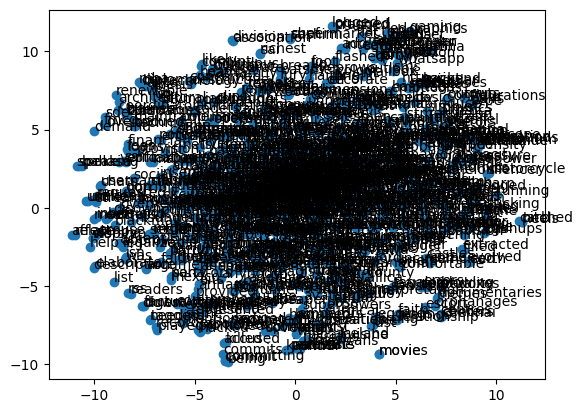

In [16]:
# TSNE representation of N words
N = 1000
wanted_vocab = random.sample(list(w2v_model.wv.index_to_key), N)  # Use index_to_key instead of vocab
X = w2v_model.wv[wanted_vocab]  # X is an array of word vectors, each vector containing 150 tokens

# TSNE transformation
tsne_model = TSNE(perplexity=40, n_components=2, init="pca", n_iter=5000, random_state=23)
Y = tsne_model.fit_transform(X)

# Plotting the TSNE result
plt.scatter(Y[:, 0], Y[:, 1])
for i, word in enumerate(wanted_vocab):
    plt.annotate(word, xy=(Y[i, 0], Y[i, 1]))
plt.show()


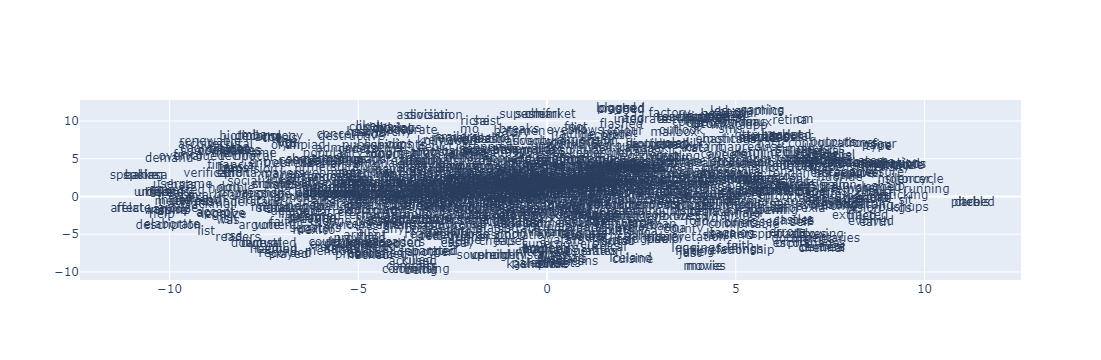

In [17]:
# Plot
trace = go.Scatter(
    x = Y[:,0],
    y = Y[:,1],
    text = list(wanted_vocab),
    mode='text'
)

data = [trace]

# Plot and embed in ipython notebook!
iplot(data, filename='basic-scatter')

## Using the model

In [18]:
# Find similar word 1
words1 = ['trump']
w2v_model.wv.most_similar(positive=words1, topn=10)

[('trumps', 0.714871346950531),
 ('knuth', 0.642415463924408),
 ('hillary', 0.5709041953086853),
 ('democrats', 0.5600058436393738),
 ('hoffman', 0.5597184300422668),
 ('obama', 0.5041598081588745),
 ('president', 0.5016978979110718),
 ('bernie', 0.49693694710731506),
 ('kaine', 0.4892711937427521),
 ('sanders', 0.4856462776660919)]

In [19]:
# Find similar word 2
words1 = ['panda', 'rabbit', 'dog']
w2v_model.wv.most_similar(positive=words1, topn=10)

[('snake', 0.678788423538208),
 ('hamster', 0.6557003855705261),
 ('chow', 0.6410647034645081),
 ('fleas', 0.6300749778747559),
 ('rabbits', 0.621217668056488),
 ('canned', 0.6206678152084351),
 ('rat', 0.6097204089164734),
 ('maltese', 0.6064860820770264),
 ('tiger', 0.6034470200538635),
 ('siberian', 0.6018490195274353)]

In [20]:
# Find similar word 4
words1 = ['husband', 'man']
words2 = ['woman']
w2v_model.wv.most_similar(positive=words1, negative=words2, topn=10)

[('wife', 0.6167154908180237),
 ('father', 0.598831832408905),
 ('dad', 0.5739336013793945),
 ('mother', 0.5703545808792114),
 ('fiancé', 0.5553892850875854),
 ('boyfriend', 0.5534617304801941),
 ('son', 0.5482978224754333),
 ('brother', 0.5301451086997986),
 ('mom', 0.5158087015151978),
 ('daughter', 0.5106670260429382)]

In [21]:
# Find similar word 5
words1 = ['president', 'trump']
words2 = ['strength']
w2v_model.wv.most_similar(positive=words1, negative=words2, topn=10)

[('democrats', 0.5356692671775818),
 ('elected', 0.5258884429931641),
 ('obama', 0.5246537327766418),
 ('barack', 0.5202588438987732),
 ('hillary', 0.5177100300788879),
 ('presidents', 0.5155341625213623),
 ('potus', 0.5023553967475891),
 ('election', 0.502065896987915),
 ('republican', 0.4956612288951874),
 ('trumps', 0.4877668023109436)]

In [22]:
# Find similar word 4
words1 = ['programming','beginner']
words2 = []
w2v_model.wv.most_similar(positive=words1, negative=words2, topn=10)

[('coding', 0.7105399966239929),
 ('python', 0.705406904220581),
 ('java', 0.6909884214401245),
 ('programmer', 0.682832658290863),
 ('javascript', 0.6253945827484131),
 ('haskell', 0.621384859085083),
 ('php', 0.6191035509109497),
 ('beginners', 0.5796228051185608),
 ('novice', 0.5768643617630005),
 ('framework', 0.5768095254898071)]

In [23]:
# What should not be there? 1
w2v_model.wv.doesnt_match(['tesla', 'bmw', 'superman', 'mercedes'])

'superman'

In [24]:
# What should not be there? 2
w2v_model.wv.doesnt_match(['trump', 'president', 'wall', 'business'])

'business'

In [25]:
# What should not be there? 3
w2v_model.wv.doesnt_match(['weed', 'beer', 'herion', 'cocain'])

'beer'

## Sources
[Wiki](https://en.wikipedia.org/wiki/Word2vec)

[Good Article 1](https://blog.acolyer.org/2016/04/21/the-amazing-power-of-word-vectors/)

[Good Article 1](http://kavita-ganesan.com/gensim-word2vec-tutorial-starter-code/#.XJfruC1_HUo)

[Tensor Flow Article](https://www.tensorflow.org/tutorials/representation/word2vec)